In [15]:
import requests
import time

iss_data = []

for i in range(1,101):
    response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")

    if response.status_code == 200:
        data = response.json()  # Convert to dictionary
        latitude = data["latitude"]
        longitude = data["longitude"]
        timestamp = data["timestamp"]

        # Add data point to the list
        iss_data.append({"latitude": latitude, "longitude": longitude,"timestamp": timestamp
        })

        print(f"{i}.  Lat: {latitude}, Lon: {longitude}, Time: {timestamp}")

    else:
        print(f"{i}.  Error")

    time.sleep(10)  # Wait 10 seconds before the next run

1.  Lat: 30.030101344375, Lon: -36.315456583197, Time: 1751363075
2.  Lat: 29.53054646199, Lon: -35.777367178992, Time: 1751363086
3.  Lat: 29.028415256365, Lon: -35.24499073471, Time: 1751363097
4.  Lat: 28.477790439526, Lon: -34.670568837961, Time: 1751363109
5.  Lat: 27.970518162021, Lon: -34.149682403684, Time: 1751363120
6.  Lat: 27.414458409116, Lon: -33.58746090106, Time: 1751363132
7.  Lat: 26.902359285072, Lon: -33.07745582461, Time: 1751363143
8.  Lat: 26.388060192736, Lon: -32.57244622451, Time: 1751363154
9.  Lat: 25.824572234115, Lon: -32.027063025345, Time: 1751363166
10.  Lat: 25.305883505603, Lon: -31.532064368809, Time: 1751363177
11.  Lat: 24.785192778815, Lon: -31.041649748609, Time: 1751363188
12.  Lat: 24.262566157489, Lon: -30.555694463046, Time: 1751363199
13.  Lat: 23.738060738129, Lon: -30.074068436756, Time: 1751363210
14.  Lat: 23.163804689125, Lon: -29.553453259729, Time: 1751363222
15.  Lat: 22.635565920882, Lon: -29.080481918295, Time: 1751363233
16.  Lat:

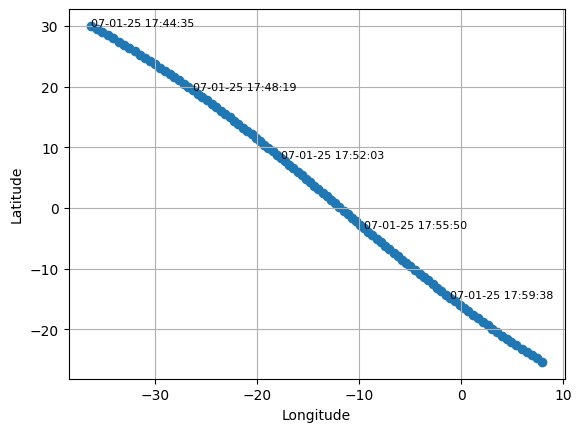

In [ ]:
import matplotlib.pyplot as plt
import datetime

x = [point["longitude"] for point in iss_data]
y = [point["latitude"] for point in iss_data]   
t = [point["timestamp"] for point in iss_data]

# plot the data
plt.scatter(x, y)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()

# label every 20th timestamp

converted_time = [datetime.datetime.fromtimestamp(timestamp).strftime('%m-%d-%y %H:%M:%S') for timestamp in t]

for i in range(len(x)): 
    if i % 20 == 0:  
        plt.text(x[i], y[i], converted_time[i], fontsize=8)

plt.show()
